In [ ]:
import os
import git

# Clone the GitHub repository
repo_url = 'https://github.com/CiCiyeah/Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong'
repo_dir = 'Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong/DOTE6635'

if not os.path.exists(repo_dir):
    git.Git().clone(repo_url)

# Change the current working directory to the cloned repository
os.chdir(repo_dir)

print("当前工作目录:", os.getcwd())

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
当前工作目录: /drive/My Drive/DOTE6635


In [ ]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [ ]:
import pandas as pd
import random

# 读取persona和catagory数据
df = pd.read_csv('resultofcorr.csv')
persona = df.iloc[:, :11]


# 定义生成提示的函数
def generate_prompts_for_single_category(persona, catagory, row_index):
    prompts = []
    varied_prices = []
    price_ratios = []
    price_multipliers = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

    row = catagory.iloc[row_index]
    category = row['Category']
    product = row['Product']
    original_price = row['Price($)']

    # 随机选取50行persona
    sampled_persona = persona.sample(n=100, replace=True)

    for _, p_row in sampled_persona.iterrows():
        # 随机选择一个价格乘数
        price_multiplier = random.choice(price_multipliers)
        varied_price = original_price * price_multiplier
        varied_prices.append(varied_price)
        price_ratio = round(varied_price / original_price, 1)
        price_ratios.append(price_ratio)

        prompt = f"""
        You are a consumer with the following characteristics:
        Age: {p_row['Age']}
        Gender: {p_row['Gender']}
        Education level: {p_row['Education']}
        Household income: {p_row['Income']}
        Occupation: {p_row['Occupation']}
        Ethnicity: {p_row['Ethnicity']}
        Marital status: {p_row['Marital Status']}
        Household size: {p_row['Household Size']}
        Number of children: {p_row['Num Children']}
        State of residence: {p_row['State']}
        Home ownership: {p_row['Home Ownership']}
        Please consider the following product category: {category}.
        Suppose you are in a grocery store, and you see the following product in that category: {product}.
        The product is currently priced at {varied_price}. A similar competing product from a different brand is priced at $8.26.
        Would you or would you not purchase this product______________[purchase or not purchase]?
        """
        prompts.append(prompt)

    return prompts, varied_prices, price_ratios

# 生成第16行的提示
prompts, varied_prices, price_ratios = generate_prompts_for_single_category(persona, catagory, 11)

# 展示前几个提示和对应的varied_price及price_ratio
for i in range(5):
    print(prompts[i])
    print(f"Price Ratio: {price_ratios[i]}")






        You are a consumer with the following characteristics:
        Age: 29
        Gender:  Female
        Education level:  Bachelor's Degree
        Household income: 75000
        Occupation:  Marketing Specialist
        Ethnicity:  Caucasian
        Marital status:  Single
        Household size: 2
        Number of children: 0
        State of residence:  California
        Home ownership:  rent
        Please consider the following product category: SoftDrinks-Carbonated.
        Suppose you are in a grocery store, and you see the following product in that category: Coca-Cola Soda Pop, 12 fl oz, 12 Pack Cans.
        The product is currently priced at 0.0. A similar competing product from a different brand is priced at $8.26.
        Would you or would you not purchase this product______________[purchase or not purchase]?
        
Price Ratio: 0.0

        You are a consumer with the following characteristics:
        Age: 25
        Gender:  Female
        Education level:

In [ ]:
import openai

# 这里填入你从第三方 API 平台获得的 Key
api_key = "sk-bclDgyI55UJGsUsxV2iK5jdj2kjmRfo3r1cO9LNv7NF2UCsB"

# 这里填入中转 API 平台提供的 API 地址，例如 "https://api.xiaoding.pro/v1"
base_url = "https://xdaicn.top/v1"

# 设置 OpenAI API 客户端
client = openai.OpenAI(
    api_key=api_key,
    base_url=base_url
)

# 发送请求
response = client.chat.completions.create(
    model="gpt-4o-mini",  # 具体模型要看第三方平台支持哪些
    messages=[{"role": "system", "content": "You are an AI assistant."},
              {"role": "user", "content": "Hello, how are you?"}],
    temperature=1
)

print(response.choices[0].message.content)


Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [ ]:
def ask_gpt(prompts):
    responses = []

    for prompt_index, prompt in enumerate(prompts[:]):
        print(f"Sending prompt {prompt_index + 1}...")  # Display which prompt is being processed

        for i in range(5):  # Send each prompt 50 times
            response = client.chat.completions.create(
                model="gpt-4o-mini",  # Use the GPT-4 mini model
                messages=[
                    {"role": "system", "content": "You, AI, are a customer. Your task is to fill in the blanks_______, Return complete information in comma-separated values, without any extra text."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0,  # Set temperature to 0
                max_tokens=5000  # Adjust max_tokens if needed
            )

            # Correct way to access the content from the response
            response_content  = response.choices[0].message.content

            # Store all responses in a list
            responses.append(response_content)

    return responses

# Example usage
responses = ask_gpt(prompts)

Sending prompt 1...
Sending prompt 2...
Sending prompt 3...
Sending prompt 4...
Sending prompt 5...
Sending prompt 6...
Sending prompt 7...
Sending prompt 8...
Sending prompt 9...
Sending prompt 10...
Sending prompt 11...
Sending prompt 12...
Sending prompt 13...
Sending prompt 14...
Sending prompt 15...
Sending prompt 16...
Sending prompt 17...
Sending prompt 18...
Sending prompt 19...
Sending prompt 20...
Sending prompt 21...
Sending prompt 22...
Sending prompt 23...
Sending prompt 24...
Sending prompt 25...
Sending prompt 26...
Sending prompt 27...
Sending prompt 28...
Sending prompt 29...
Sending prompt 30...
Sending prompt 31...
Sending prompt 32...
Sending prompt 33...
Sending prompt 34...
Sending prompt 35...
Sending prompt 36...
Sending prompt 37...
Sending prompt 38...
Sending prompt 39...
Sending prompt 40...
Sending prompt 41...
Sending prompt 42...
Sending prompt 43...
Sending prompt 44...
Sending prompt 45...
Sending prompt 46...
Sending prompt 47...
Sending prompt 48...
S

In [ ]:
# prompt: 把上面代码生成的结果存在一个csv里面，用英文encoding

import pandas as pd

# Assuming 'responses' is the list of strings you got from the previous code
# Create a DataFrame from the list of strings
df_responses = pd.DataFrame({'response': responses})

# Save the DataFrame to a CSV file with UTF-8 encoding
# df_responses.to_csv('defineyourname.csv', encoding='utf-8', index=False)
# please write your own csv name if you want to write.

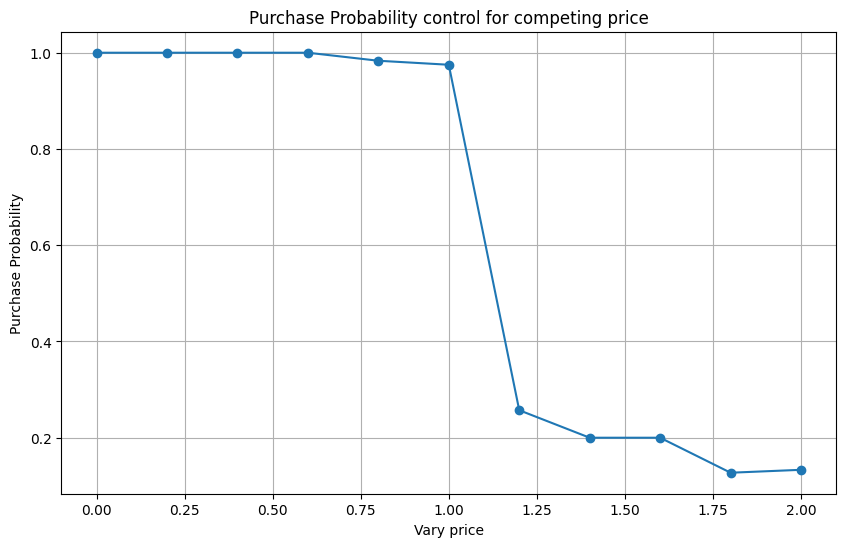

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 提取价格并存储为一列数据
prices = price_ratios

# 读取demoresponses.csv文件，得到purchase probability
demoresponses = pd.read_csv('demoresponses.csv')
purchase_probability = demoresponses['response']

# 将purchase_probability列转换为数值型
purchase_probability = pd.to_numeric(purchase_probability, errors='coerce')

# 每5列进行平均
purchase_probability_avg = purchase_probability.groupby(purchase_probability.index // 5).mean()

# 确保price_ratios和purchase_probability_avg长度一致
price_ratios = price_ratios[:len(purchase_probability_avg)]

# 创建DataFrame并合并
data = pd.DataFrame({'price_ratios': price_ratios, 'purchase_probability_avg': purchase_probability_avg})

# 计算purchase_probability_avg在price_ratios取不同值时的平均值
average_purchase_probability = data.groupby('price_ratios')['purchase_probability_avg'].mean()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(average_purchase_probability.index, average_purchase_probability, marker='o')
plt.xlabel('Vary price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability control for competing price')
plt.grid(True)
plt.show()


